In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 13),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
plt.rc('axes', labelsize=14)

In [180]:
ondem_1xload = np.array([0.413, 0.41, 0.433, 0.408, 0.423, 0.423]) * 1000
ondem_3xload = np.array([0.545, 0.51, 0.53, 0.463, 0.573]) * 1000
hup_1xload = np.array([0.623, 0.578, 0.6, 0.595, 0.603]) * 1000
hup_3xload = np.array([0.775, 0.69, 0.71, 0.723, 0.775, 0.698]) * 1000
newhup_1xload = np.array([0.558, 0.648, 0.603, 0.62, 0.56, 0.595]) * 1000 
newhup_3xload = np.array([0.743, 0.775, 0.8, 0.775, 0.775, 0.775]) * 1000
#newhup_1xload = np.array([0.613, 0.598, 0.638, 0.6, 0.563, 0.598]) # debug build
#newhup_3xload = np.array([0.775, 0.733, 0.825, 0.825, 0.735, 0.775]) # debug build

ondem_1xload_energy = np.array([37.39, 37.99, 40.92, 37.7, 37.96, 38.26])
ondem_3xload_energy = np.array([75.14, 70.43, 70.31, 71.27, 76.18])
hup_1xload_energy = np.array([34.01, 35.3, 33.83, 35.17, 35.81])
hup_3xload_energy = np.array([53.72, 53.93, 54.29, 56.37, 54.38, 55.02])
newhup_1xload_energy = np.array([34.19, 36.82, 34.6, 35.9, 34.29, 33.55])
newhup_3xload_energy = np.array([55.3, 55.93, 57.04, 56.65, 54.58, 57.37])
#newhup_1xload_energy = np.array([36.66, 37.27, 34.45, 33.65, 35.32, 35.54]) # debug build
#newhup_3xload_energy = np.array([54.23, 54.58, 57.43, 57.03, 53.79, 56.98]) # debug build

ondem_std: [8.787617550976044, 36.864074652702186]
hup_std: [14.469277798148736, 34.42261853297431]
newhup_std: [31.7787490139069, 16.53699556213952]

ondem_std_energy: [1.1716370313938245, 2.4886992586489844]
hup_std_energy: [0.7705997664157458, 0.8827120456612987]
newhup_std_energy: [1.1161454007232021, 0.9803188256888675]



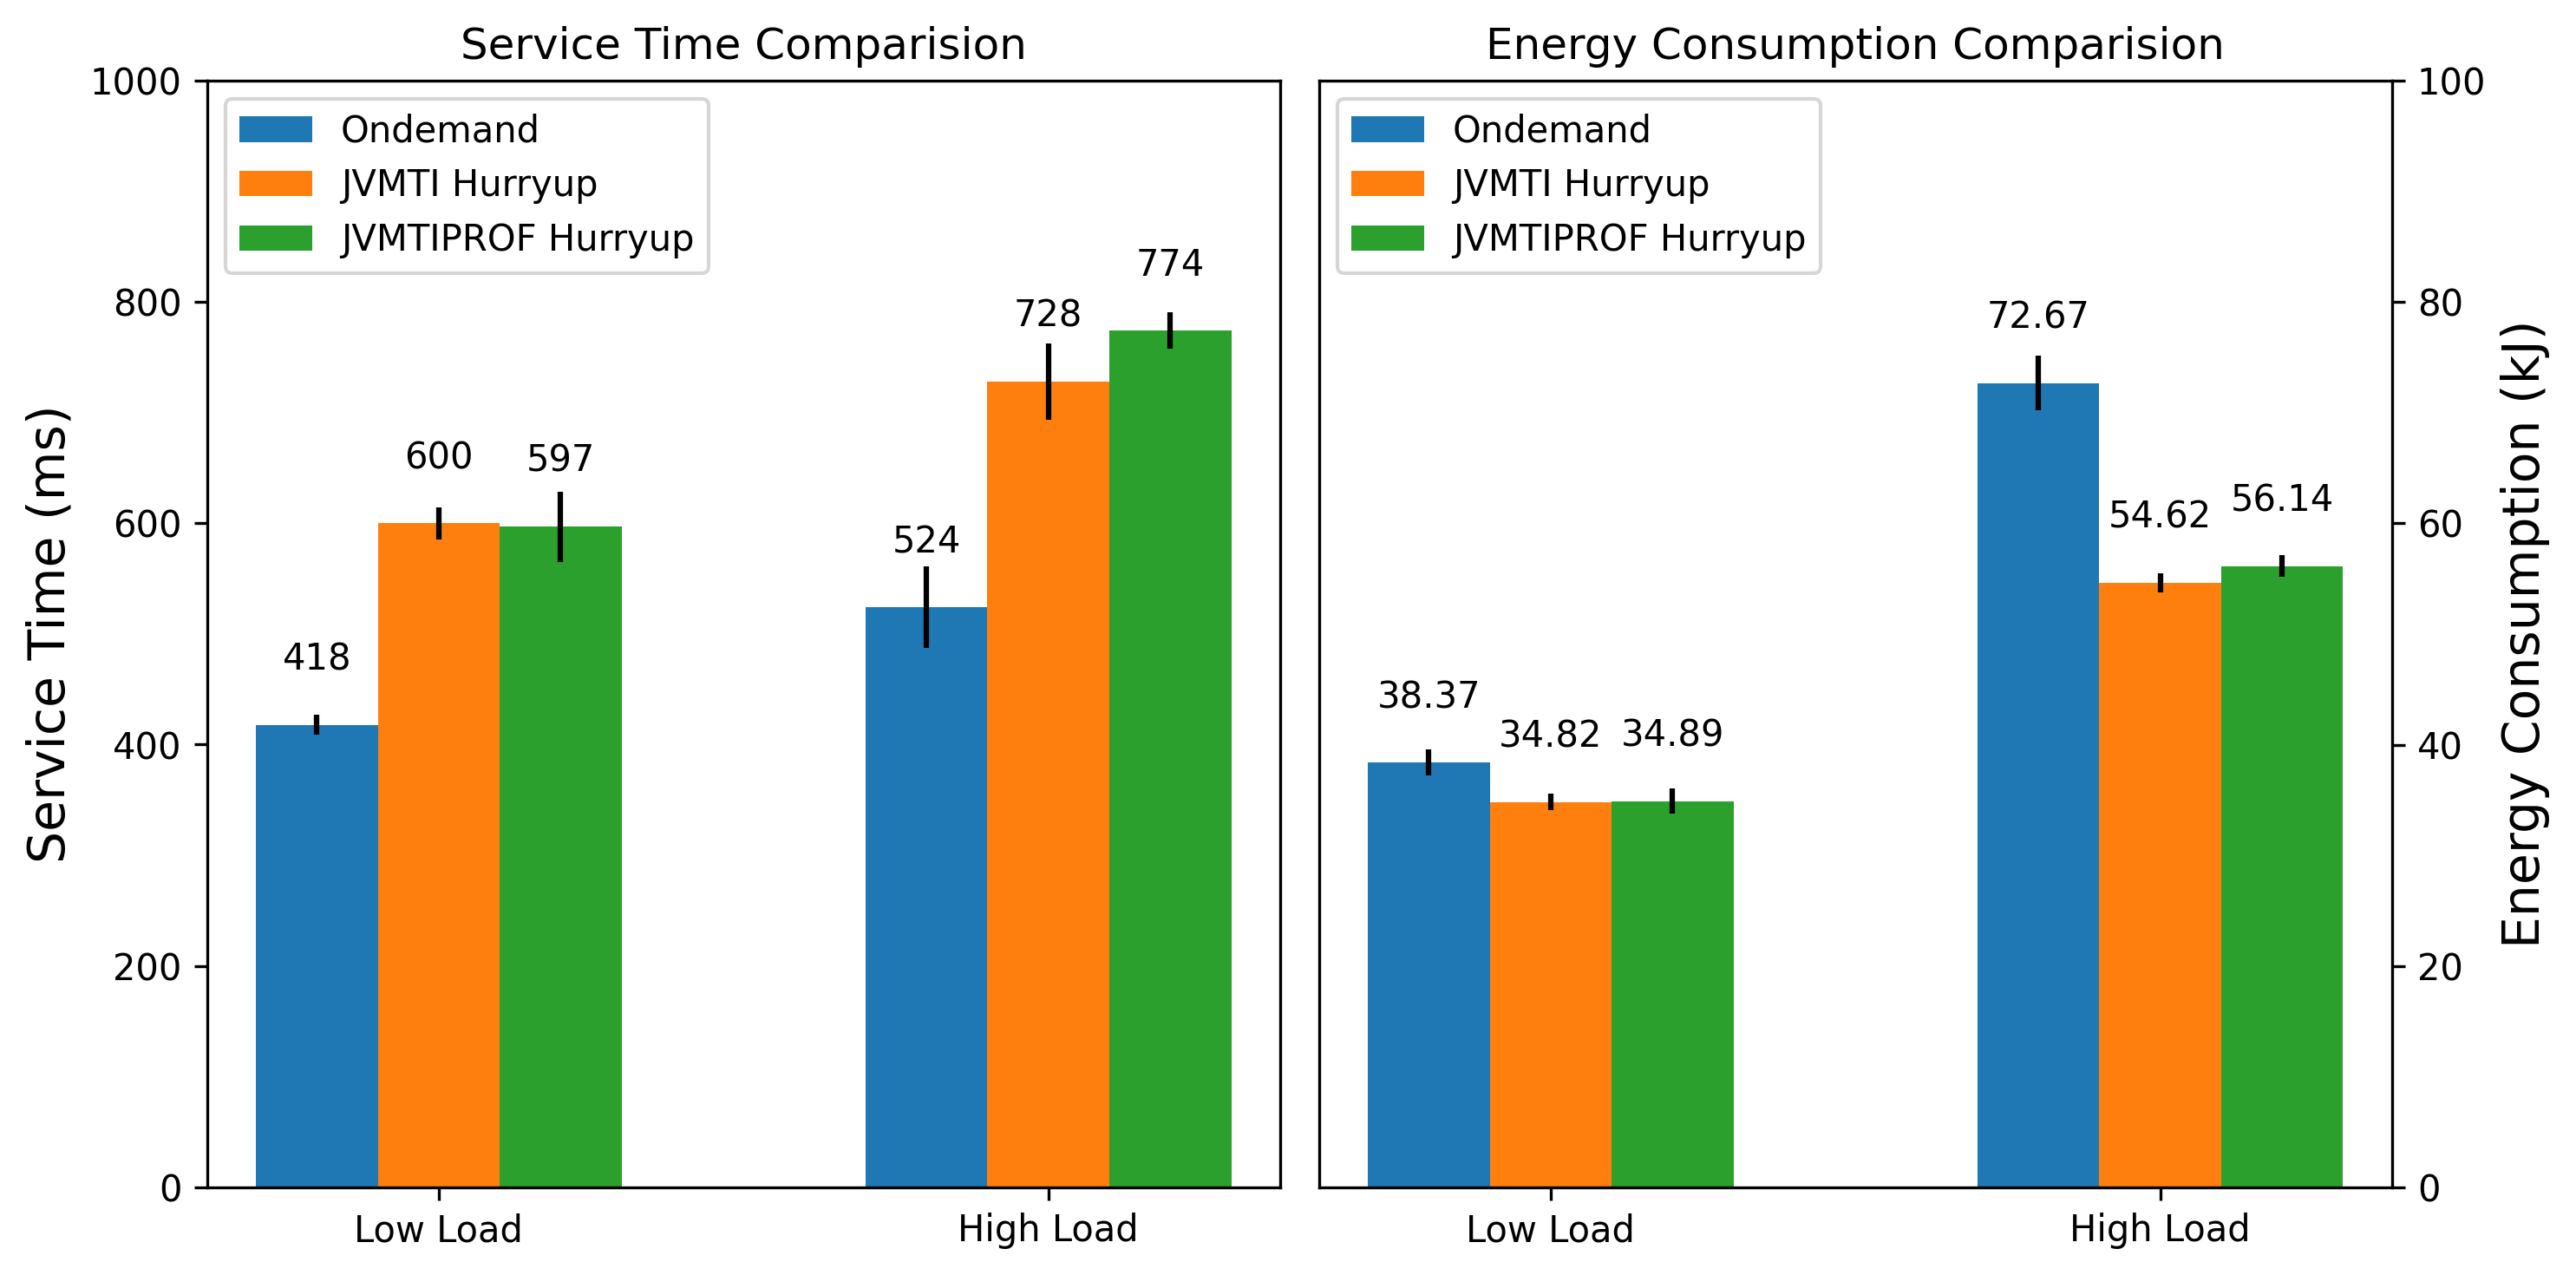

In [186]:
#width = 0.20  # the width of the bars
labels=['Low Load', 'High Load']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
#x = np.arange(len(labels))


round_p99 = 0
ondem_means = np.round([ondem_1xload.mean(), ondem_3xload.mean()],round_p99)
ondem_std = [ondem_1xload.std(), ondem_3xload.std()]
hup_means = np.round([hup_1xload.mean(), hup_3xload.mean()],round_p99)
hup_std = [hup_1xload.std(), hup_3xload.std()]
newhup_means = np.round([newhup_1xload.mean(), newhup_3xload.mean()],round_p99)
newhup_std = [newhup_1xload.std(), newhup_3xload.std()]
print("ondem_std:", ondem_std)
print("hup_std:", hup_std)
print("newhup_std:", newhup_std)
print()
width = 0.2
x = [width, width * 6]

#fig, axs = plt.subplots(2, 1, figsize=(5.5,8), dpi=300)
fig, axs = plt.subplots(1, 2, figsize=(10,5), dpi=300)
ax = axs[0]

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
#rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r1, ondem_means.astype(int), width, yerr=ondem_std, label="Ondemand")
rects4 = ax.bar(r2, hup_means.astype(int), width, yerr=hup_std, label="JVMTI Hurryup")
rects5 = ax.bar(r3, newhup_means.astype(int), width, yerr=newhup_std, label="JVMTIPROF Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (ms)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Service Time Comparision')
ax.set_xticks(x)
ax.set_ylim(0,1.0*1000)
#ax.axhline(y=1*1000, color='black', linestyle='--')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')



#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

ax = axs[1]


round_energy = 2
ondem_means_energy = np.round([ondem_1xload_energy.mean(), ondem_3xload_energy.mean()],round_energy)
ondem_std_energy = [ondem_1xload_energy.std(), ondem_3xload_energy.std()]
hup_means_energy = np.round([hup_1xload_energy.mean(), hup_3xload_energy.mean()],round_energy)
hup_std_energy = [hup_1xload_energy.std(), hup_3xload_energy.std()]
newhup_means_energy = np.round([newhup_1xload_energy.mean(), newhup_3xload_energy.mean()],round_energy)
newhup_std_energy = [newhup_1xload_energy.std(), newhup_3xload_energy.std()]
print("ondem_std_energy:", ondem_std_energy)
print("hup_std_energy:", hup_std_energy)
print("newhup_std_energy:", newhup_std_energy)
print()

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
#rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r1, ondem_means_energy, width, yerr=ondem_std_energy, label="Ondemand")
rects4 = ax.bar(r2, hup_means_energy, width, yerr=hup_std_energy, label="JVMTI Hurryup")
rects5 = ax.bar(r3, newhup_means_energy, width, yerr=newhup_std_energy, label="JVMTIPROF Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption Comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
#ax.set_xlabel('Server Load', fontsize=8)


#autolabel(rects1)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

ax.set_ylim(0,100)

#fig.text(0.5, 0.0, 'Server Load', ha='center')
fig.tight_layout()

plt.show()
fig.savefig('/home/denimorim/dev/elastic-hurryup/graphs/jvmtiprof_graphs/ondem_vs_hup_vs_newhup.png')

In [187]:
## Overhead

jvmti_overhead_1xload = np.array([0.408, 0.408, 0.423, 0.43, 0.43, 0.413]) * 1000
jvmtiprof_overhead_1xload = np.array([0.408, 0.408, 0.423, 0.43, 0.43, 0.413]) * 1000
jvmti_overhead_1xload_energy = np.array([38.95, 37.58, 37.77, 40.62, 39.6, 37.51])
jvmtiprof_overhead_1xload_energy = np.array([37.26, 37.35, 38.06, 37.82, 37.03, 39.2])

jvmti_overhead_3xload = np.array([0.54, 0.543, 0.445, 0.478, 0.555, 0.508]) * 1000
jvmtiprof_overhead_3xload = np.array([0.525, 0.475, 0.563, 0.533, 0.465, 0.52]) * 1000
jvmti_overhead_3xload_energy = np.array([66.25, 74.12, 75.12, 70.07, 72.91, 67.25])
jvmtiprof_overhead_3xload_energy = np.array([72.46, 69.11, 65.92, 69.98, 71.72, 75.42])

nothing_std: [8.787617550976044, 36.864074652702186]
with_jvmti_std: [9.445751543536502, 39.271490931717885]
with_jvmtiprof_std: [9.445751543536502, 33.762651949553174]

nothing_std_energy: [1.1716370313938245, 2.4886992586489844]
with_jvmti_std_energy: [1.161140483413709, 3.3623834139226645]
with_jvmtiprof_std_energy: [0.720408834543893, 2.951928277508712]



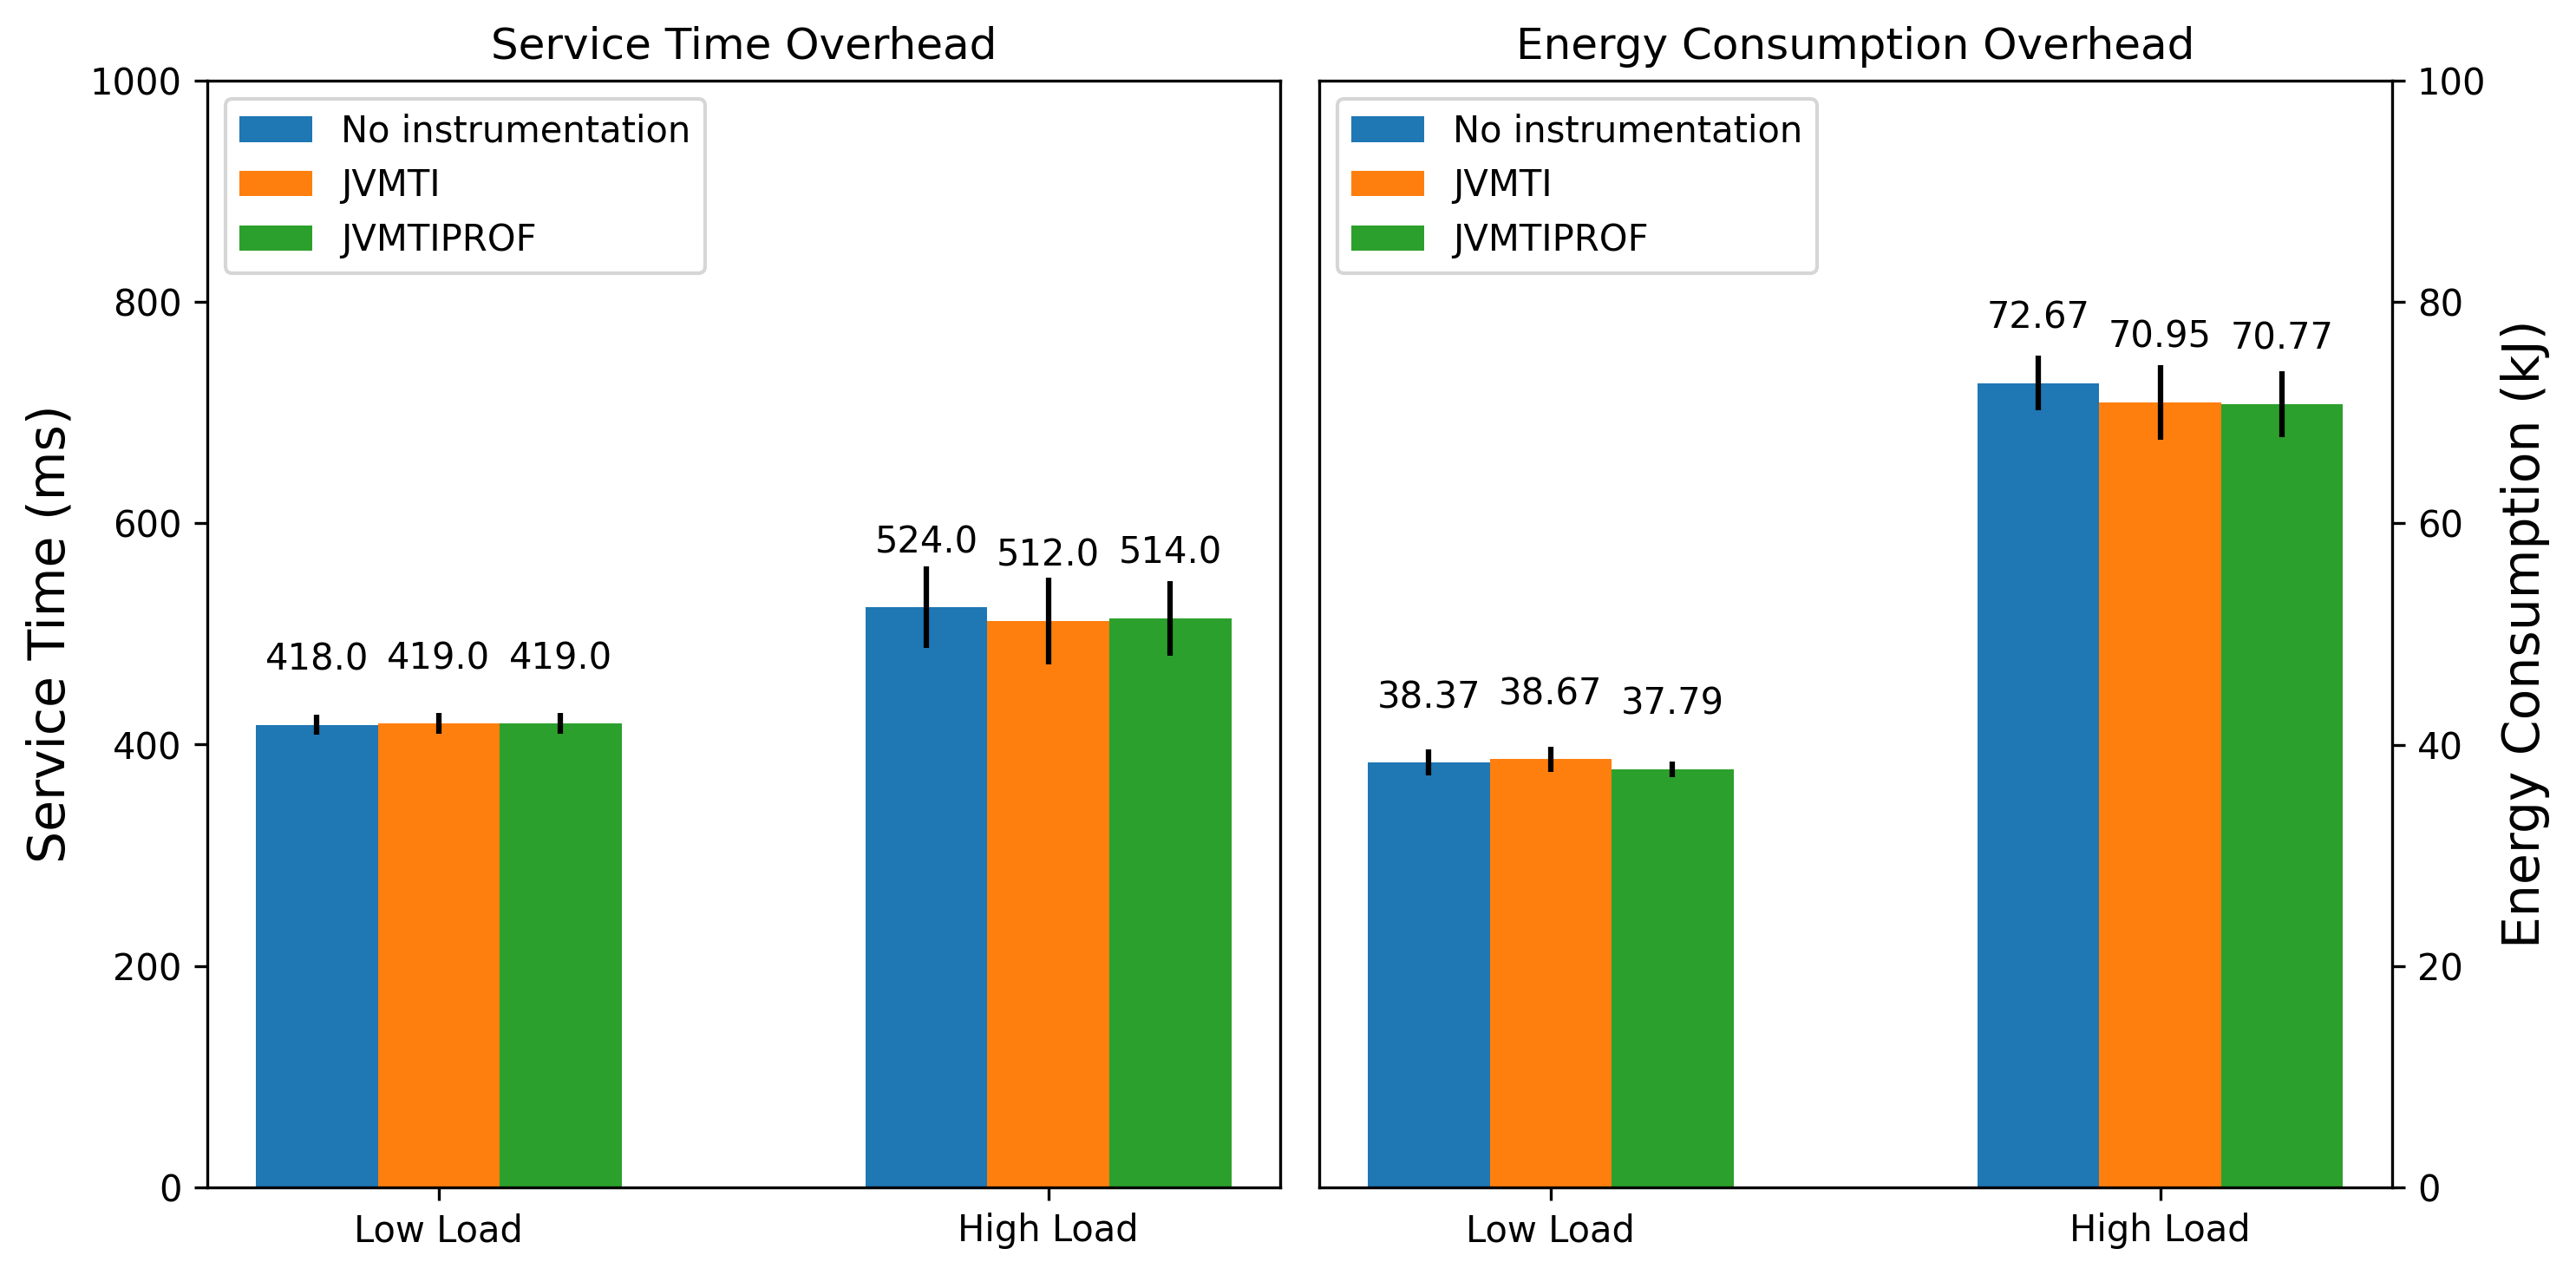

In [188]:
width = 0.2  # the width of the bars
labels=['Low Load', 'High Load']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
#x = np.arange(len(labels))

with_jvmti = np.round([jvmti_overhead_1xload.mean(), jvmti_overhead_3xload.mean()],round_p99)
with_jvmti_std = [jvmti_overhead_1xload.std(), jvmti_overhead_3xload.std()]
with_jvmtiprof = np.round([jvmtiprof_overhead_1xload.mean(), jvmtiprof_overhead_3xload.mean()],round_p99)
with_jvmtiprof_std = [jvmtiprof_overhead_1xload.std(), jvmtiprof_overhead_3xload.std()]
print("nothing_std:", ondem_std)
print("with_jvmti_std:", with_jvmti_std)
print("with_jvmtiprof_std:", with_jvmtiprof_std)
print()

x = [width, width * 6]

fig, axs = plt.subplots(1, 2, figsize=(10,5), dpi=300)
ax = axs[0]

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
#rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r1, ondem_means, width, yerr=ondem_std, label="No instrumentation")
rects4 = ax.bar(r2, with_jvmti, width, yerr=with_jvmti_std, label="JVMTI")
rects5 = ax.bar(r3, with_jvmtiprof, width, yerr=with_jvmtiprof_std, label="JVMTIPROF")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (ms)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Service Time Overhead')
ax.set_xticks(x)
ax.set_ylim(0,1.0*1000)
#ax.axhline(y=1*1000, color='black', linestyle='--')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')



#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


ax = axs[1]


with_jvmti_energy = np.round([jvmti_overhead_1xload_energy.mean(), jvmti_overhead_3xload_energy.mean()],round_energy)
with_jvmti_std_energy = [jvmti_overhead_1xload_energy.std(), jvmti_overhead_3xload_energy.std()]
with_jvmtiprof_energy = np.round([jvmtiprof_overhead_1xload_energy.mean(), jvmtiprof_overhead_3xload_energy.mean()],round_energy)
with_jvmtiprof_std_energy = [jvmtiprof_overhead_1xload_energy.std(), jvmtiprof_overhead_3xload_energy.std()]
print("nothing_std_energy:", ondem_std_energy)
print("with_jvmti_std_energy:", with_jvmti_std_energy)
print("with_jvmtiprof_std_energy:", with_jvmtiprof_std_energy)
print()

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
#rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r1, ondem_means_energy, width, yerr=ondem_std_energy, label="No instrumentation")
rects4 = ax.bar(r2, with_jvmti_energy, width, yerr=with_jvmti_std_energy, label="JVMTI")
rects5 = ax.bar(r3, with_jvmtiprof_energy, width, yerr=with_jvmtiprof_std_energy, label="JVMTIPROF")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption Overhead')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
#ax.set_xlabel('Server Load', fontsize=8)


#autolabel(rects1)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

ax.set_ylim(0,100)
fig.tight_layout()
plt.show()
fig.savefig('/home/denimorim/dev/elastic-hurryup/graphs/jvmtiprof_graphs/overhead.png')

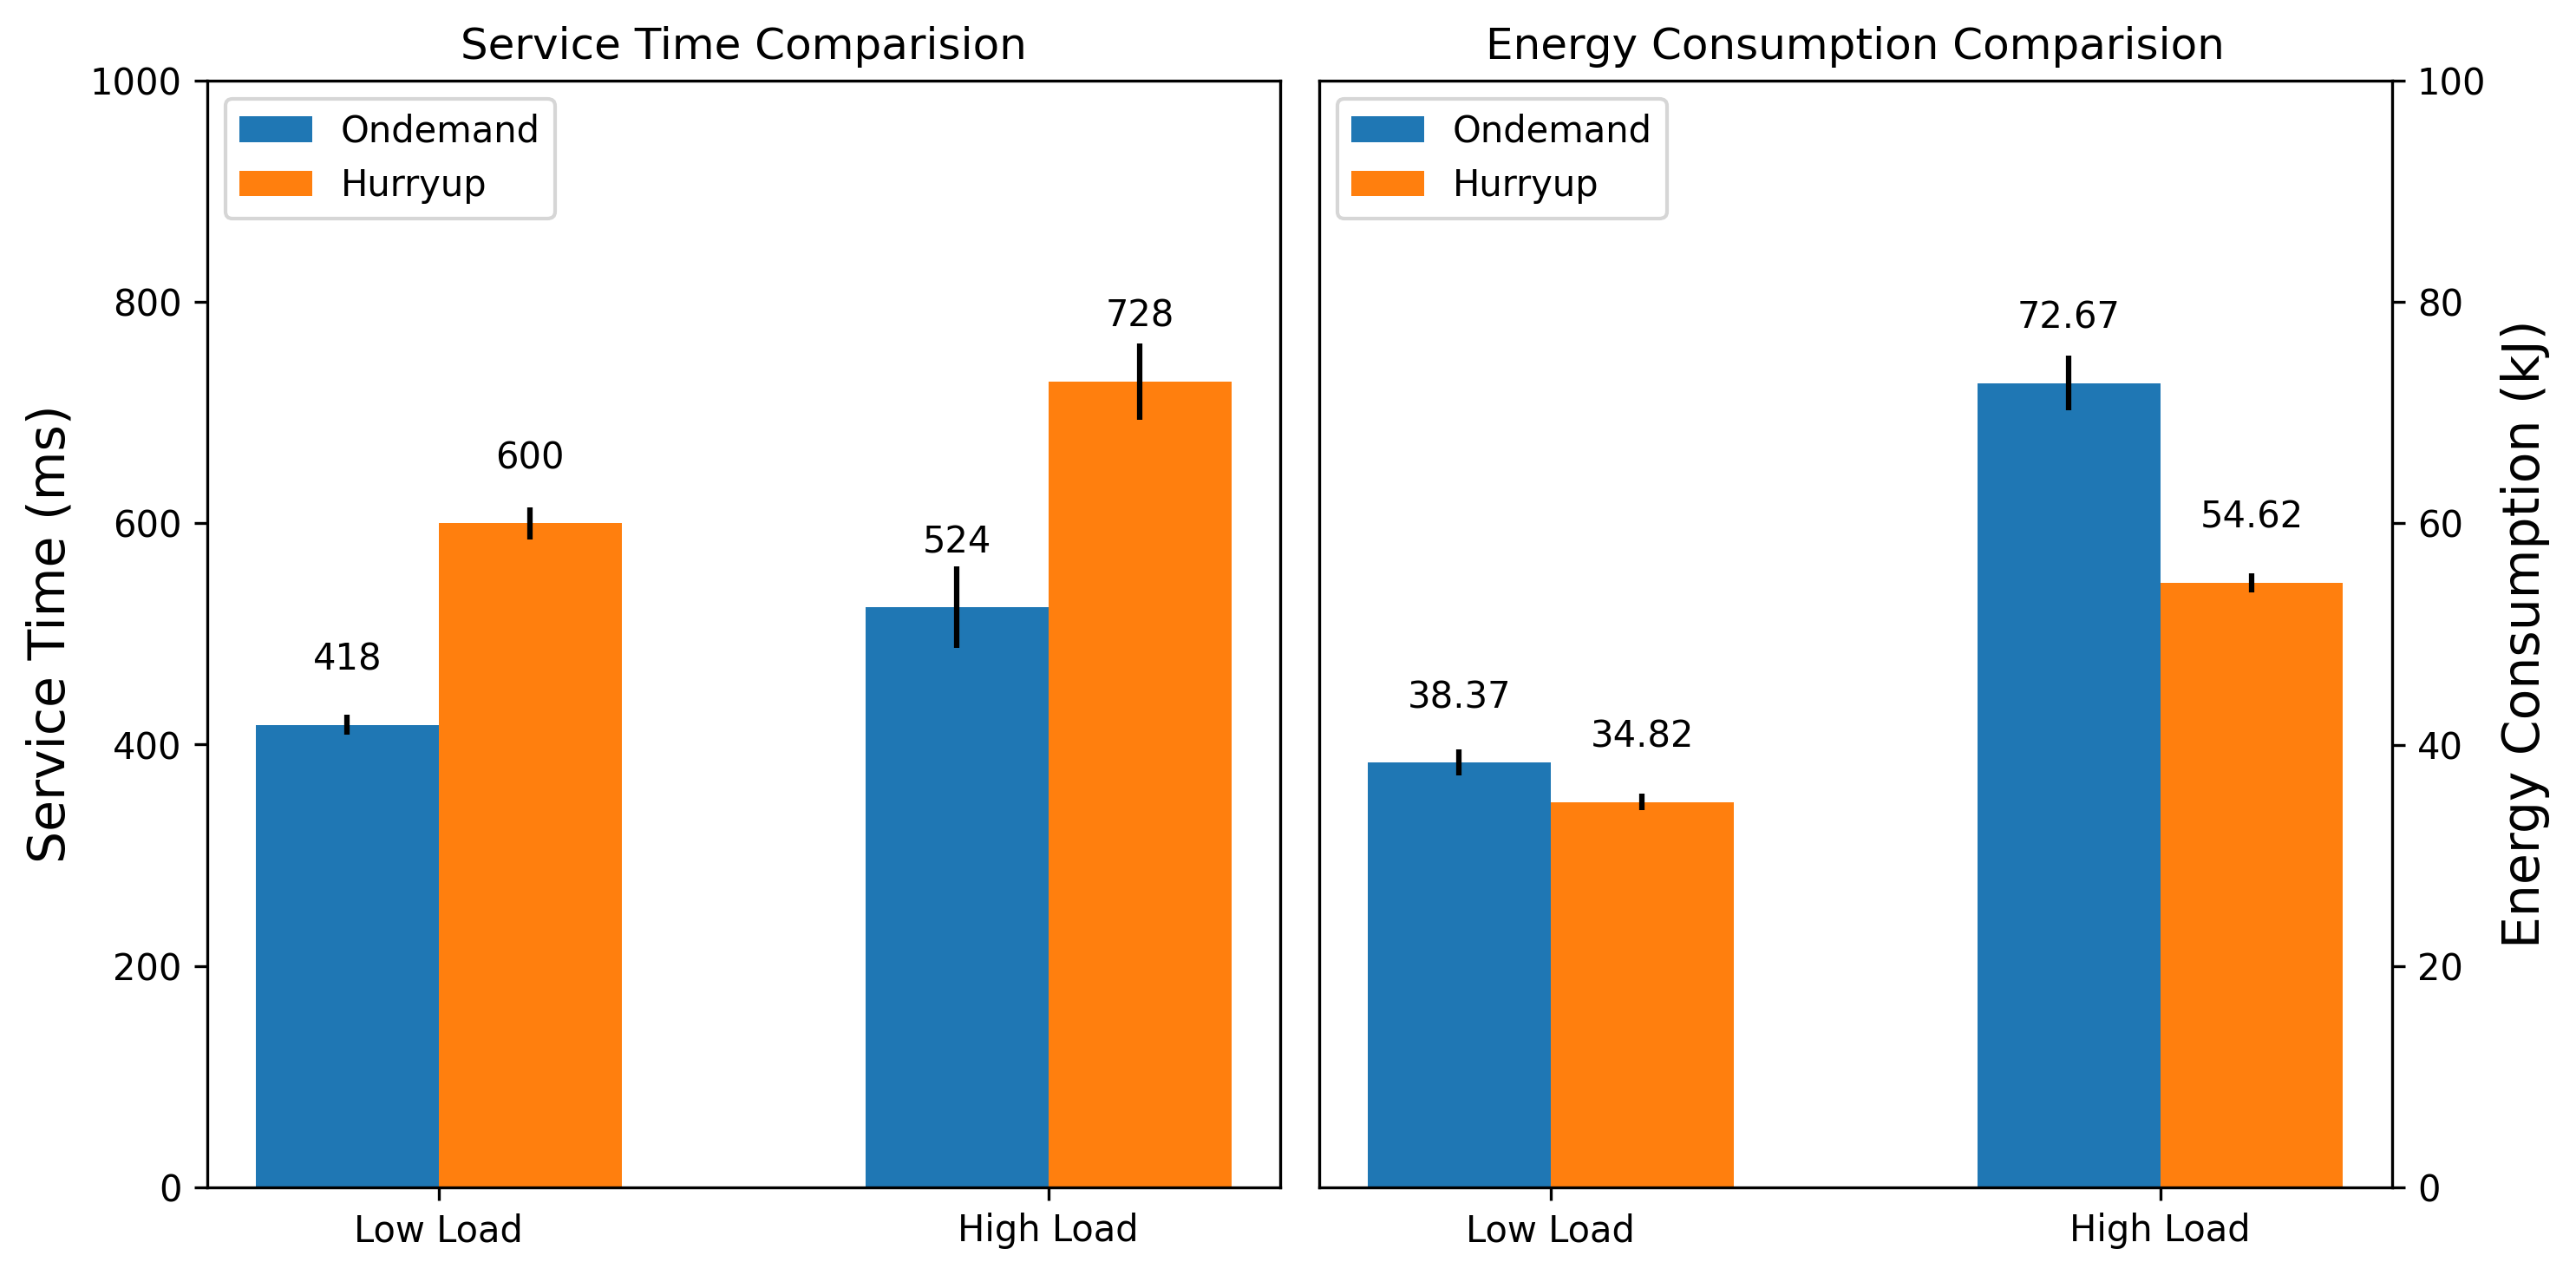

In [189]:
#width = 0.20  # the width of the bars
labels=['Low Load', 'High Load']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
#x = np.arange(len(labels))

width = 0.3
x = [0.15, 1.15]

fig, axs = plt.subplots(1, 2, figsize=(10,5), dpi=300)
ax = axs[0]

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
#rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r1, ondem_means.astype(int), width, yerr=ondem_std, label="Ondemand")
rects4 = ax.bar(r2, hup_means.astype(int), width, yerr=hup_std, label="Hurryup")
#rects5 = ax.bar(r3, newhup_means.astype(int), width, yerr=newhup_std, label="JVMTIPROF Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (ms)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Service Time Comparision')
ax.set_xticks(x)
ax.set_ylim(0,1.0*1000)
#ax.axhline(y=1*1000, color='black', linestyle='--')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')



#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)

ax = axs[1]

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
#rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r1, ondem_means_energy, width, yerr=ondem_std_energy, label="Ondemand")
rects4 = ax.bar(r2, hup_means_energy, width, yerr=hup_std_energy, label="Hurryup")
#rects5 = ax.bar(r3, newhup_means_energy, width, yerr=newhup_std_energy, label="JVMTIPROF Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption Comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
#ax.set_xlabel('Server Load', fontsize=8)


#autolabel(rects1)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)

ax.set_ylim(0,100)
fig.tight_layout()

plt.show()
fig.savefig('/home/denimorim/dev/elastic-hurryup/graphs/jvmtiprof_graphs/ondem_vs_hup.png')